In [3]:
# 1. Unggah File CSV
print("Silakan unggah file 'BMKG Jateng - Sheet1.csv'")
from google.colab import files
uploaded = files.upload()

file_name = 'BMKG Jateng - Sheet1.csv'
print(f"\nFile '{file_name}' berhasil diunggah.")

Silakan unggah file 'BMKG Jateng - Sheet1.csv'


Saving BMKG Jateng - Sheet1.csv to BMKG Jateng - Sheet1.csv

File 'BMKG Jateng - Sheet1.csv' berhasil diunggah.


=

In [15]:
# --- 2. Muat dan Pembersihan Awal Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

print("\n--- Memulai Muat dan Pembersihan Awal Data (Bagian 2) ---")
try:
    df_raw = pd.read_csv(file_name, decimal=',', na_values=['-',''])
    print("\nData mentah berhasil dimuat.")
except Exception as e:
    print(f"Error saat memuat data: {e}")
    # df_raw = pd.read_csv(file_name, decimal=',', na_values=['-',''], encoding='latin1')

# Simpan salinan data mentah sebelum modifikasi untuk inspeksi Bagian 2
df_bagian2_output_raw = df_raw.copy()

# Tampilkan beberapa baris pertama data mentah
print("\nBeberapa baris pertama data mentah (awal Bagian 2):")
print(df_raw.head())
print("\nTipe data awal (awal Bagian 2):")
print(df_raw.info())


--- Memulai Muat dan Pembersihan Awal Data (Bagian 2) ---

Data mentah berhasil dimuat.

Beberapa baris pertama data mentah (awal Bagian 2):
      TANGGAL    TN    TX  TAVG  RH_AVG   RR   SS  FF_X  DDD_X  FF_AVG
0  01-01-2019  24.8  31.0  27.8    82.0  3.2  5.4   8.0  350.0     3.0
1  02-01-2019  25.6  31.0  27.5    84.0  0.0  2.5   5.0  270.0     2.0
2  03-01-2019  25.0  29.8  27.5    85.0  1.6  2.6   4.0   10.0     1.0
3  04-01-2019  25.2  31.0  28.1    80.0  NaN  0.0   6.0   10.0     2.0
4  05-01-2019  25.2  31.0  28.5    81.0  0.0  0.0   5.0  340.0     2.0

Tipe data awal (awal Bagian 2):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  2352 non-null   object 
 1   TN       2342 non-null   float64
 2   TX       2345 non-null   float64
 3   TAVG     2339 non-null   float64
 4   RH_AVG   2329 non-null   float64
 5   RR       2292 non-nul

In [16]:
# Konversi kolom TANGGAL ke datetime
try:
    df_raw['TANGGAL'] = pd.to_datetime(df_raw['TANGGAL'], format='%d-%m-%Y')
    print("\nKolom TANGGAL berhasil dikonversi ke datetime.")
except ValueError as e:
    print(f"Error konversi tanggal: {e}. Periksa format tanggal di CSV.")

# Set TANGGAL sebagai index
df_raw.set_index('TANGGAL', inplace=True)

# Drop kolom DDD_CAR karena tidak akan diprediksi/digunakan
if 'DDD_CAR' in df_raw.columns:
    df_raw.drop('DDD_CAR', axis=1, inplace=True)
    print("\nKolom 'DDD_CAR' telah dihapus.")

# Konversi kolom numerik lainnya
numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
for col in numeric_cols:
    if col in df_raw.columns:
        if df_raw[col].dtype == 'object':
            df_raw[col] = df_raw[col].str.strip()
            df_raw[col] = df_raw[col].str.replace(',', '.', regex=False)
        df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

print("\nTipe data setelah konversi numerik (akhir Bagian 2):")
print(df_raw.info())


Kolom TANGGAL berhasil dikonversi ke datetime.

Tipe data setelah konversi numerik (akhir Bagian 2):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2352 entries, 2019-01-01 to 2025-06-09
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TN      2342 non-null   float64
 1   TX      2345 non-null   float64
 2   TAVG    2339 non-null   float64
 3   RH_AVG  2329 non-null   float64
 4   RR      2292 non-null   float64
 5   SS      2295 non-null   float64
 6   FF_X    2351 non-null   float64
 7   DDD_X   2351 non-null   float64
 8   FF_AVG  2351 non-null   float64
dtypes: float64(9)
memory usage: 183.8 KB
None


In [17]:
print("\nData setelah pembersihan awal (akhir Bagian 2):")
print(df_raw.head())


Data setelah pembersihan awal (akhir Bagian 2):
              TN    TX  TAVG  RH_AVG   RR   SS  FF_X  DDD_X  FF_AVG
TANGGAL                                                            
2019-01-01  24.8  31.0  27.8    82.0  3.2  5.4   8.0  350.0     3.0
2019-01-02  25.6  31.0  27.5    84.0  0.0  2.5   5.0  270.0     2.0
2019-01-03  25.0  29.8  27.5    85.0  1.6  2.6   4.0   10.0     1.0
2019-01-04  25.2  31.0  28.1    80.0  NaN  0.0   6.0   10.0     2.0
2019-01-05  25.2  31.0  28.5    81.0  0.0  0.0   5.0  340.0     2.0


In [ ]:
# Ekspor dan Unduh Data Hasil Bagian 2
df_bagian2_output_cleaned = df_raw.copy() # df_raw sudah dimodifikasi
csv_filename_bagian2_raw = 'hasil_bagian2_data_mentah_awal.csv'
csv_filename_bagian2_cleaned = 'hasil_bagian2_data_setelah_pembersihan_awal.csv'

print(f"\nMengekspor data mentah awal Bagian 2 ke {csv_filename_bagian2_raw}...")
df_bagian2_output_raw.to_csv(csv_filename_bagian2_raw, index=False) # index=False karena TANGGAL belum jadi index
files.download(csv_filename_bagian2_raw)
print(f"File {csv_filename_bagian2_raw} siap diunduh.")

print(f"\nMengekspor data setelah pembersihan awal Bagian 2 ke {csv_filename_bagian2_cleaned}...")
df_bagian2_output_cleaned.to_csv(csv_filename_bagian2_cleaned, index=True) # index=True karena TANGGAL sudah jadi index
files.download(csv_filename_bagian2_cleaned)
print(f"File {csv_filename_bagian2_cleaned} siap diunduh.")

print("\n--- Muat dan Pembersihan Awal Data (Bagian 2) Selesai ---")


Mengekspor data mentah awal Bagian 2 ke hasil_bagian2_data_mentah_awal.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian2_data_mentah_awal.csv siap diunduh.

Mengekspor data setelah pembersihan awal Bagian 2 ke hasil_bagian2_data_setelah_pembersihan_awal.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian2_data_setelah_pembersihan_awal.csv siap diunduh.

--- Muat dan Pembersihan Awal Data (Bagian 2) Selesai ---


=

In [18]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- Memulai Exploratory Data Analysis (EDA) (Bagian 3) ---")

# df_eda_input adalah df_raw yang sudah dibersihkan dari Bagian 2
# Kita buat salinan untuk memastikan df_raw tidak termodifikasi jika ada operasi tak sengaja
df_eda_input = df_raw.copy()
primary_blue_color = 'royalblue'

# A. Statistik Deskriptif
print("\nStatistik Deskriptif (EDA):")
print(df_eda_input.describe())


--- Memulai Exploratory Data Analysis (EDA) (Bagian 3) ---

Statistik Deskriptif (EDA):
                TN           TX         TAVG       RH_AVG           RR  \
count  2342.000000  2345.000000  2339.000000  2329.000000  2292.000000   
mean     24.884842    32.844989    28.556221    78.556033   189.325131   
std       1.178900     1.801647     1.249653     7.837069  1262.616995   
min      18.400000    25.000000    23.800000    40.000000     0.000000   
25%      24.200000    31.600000    27.700000    73.000000     0.000000   
50%      25.000000    32.800000    28.500000    80.000000     0.000000   
75%      25.600000    34.000000    29.300000    84.000000     6.500000   
max      28.000000    39.400000    32.400000    98.000000  9999.000000   

                SS         FF_X        DDD_X       FF_AVG  
count  2295.000000  2351.000000  2351.000000  2351.000000  
mean      6.621481     5.330923   233.279881     2.043811  
std       2.935241     1.511170   116.331635     0.731215  
min 


Jumlah nilai hilang per kolom (EDA):
TN        10
TX         7
TAVG      13
RH_AVG    23
RR        60
SS        57
FF_X       1
DDD_X      1
FF_AVG     1
dtype: int64


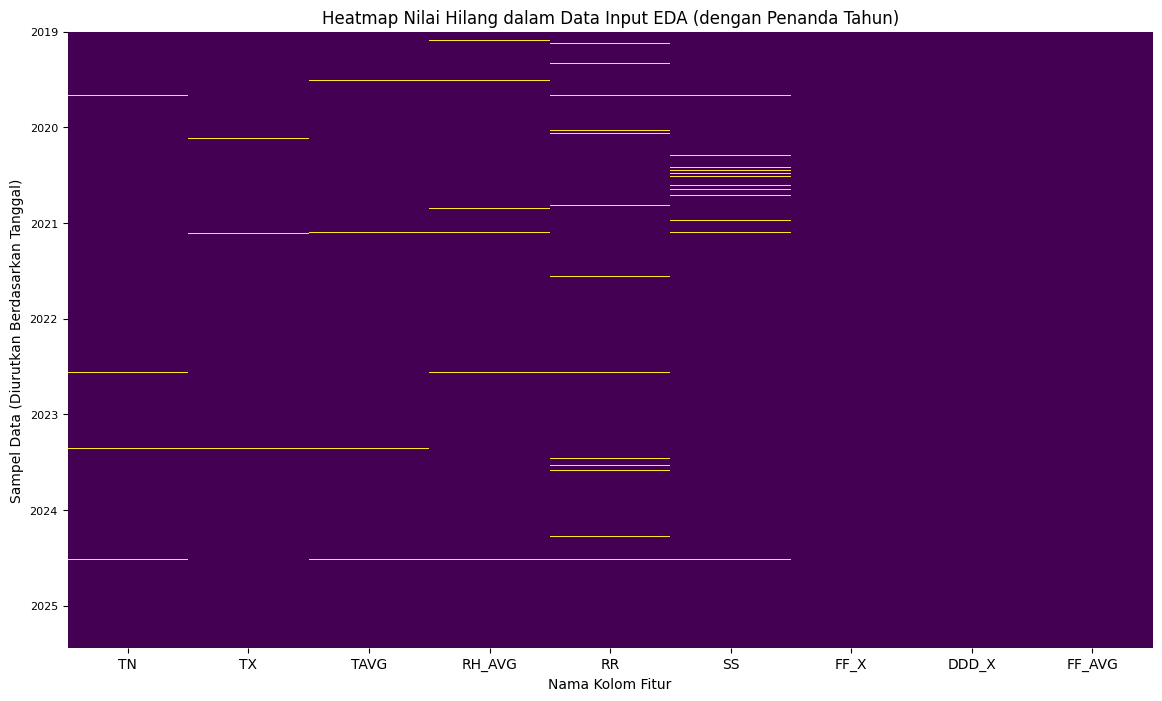

In [19]:
# Asumsikan df_eda_input sudah ada dan diindeks berdasarkan tanggal

# B. Cek dan Visualisasi Nilai Hilang
print("\nJumlah nilai hilang per kolom (EDA):")
missing_values_eda = df_eda_input.isnull().sum()
print(missing_values_eda[missing_values_eda > 0]) # Tampilkan hanya kolom dengan nilai hilang

if df_eda_input.isnull().sum().sum() > 0:
    plt.figure(figsize=(14, 8)) # Mungkin perlu ukuran lebih besar

    # Membuat matriks boolean True/False untuk nilai hilang
    missing_matrix = df_eda_input.isnull()

    ax = sns.heatmap(missing_matrix, cbar=False, cmap='viridis', yticklabels=False) # yticklabels=False agar tidak terlalu ramai
    plt.title('Heatmap Nilai Hilang dalam Data Input EDA (dengan Penanda Tahun)')
    plt.xlabel('Nama Kolom Fitur')
    plt.ylabel('Sampel Data (Diurutkan Berdasarkan Tanggal)')

    # Menambahkan penanda tahun pada sumbu Y
    # Dapatkan tahun unik dan posisi baris pertama setiap tahun
    unique_years = df_eda_input.index.year.unique()
    year_positions = []
    year_labels = []

    for year in unique_years:
        # Temukan indeks baris pertama untuk tahun tersebut di missing_matrix
        # Karena missing_matrix memiliki index yang sama dengan df_eda_input
        try:
            # Dapatkan indeks numerik dari baris pertama tahun tersebut
            first_occurrence_index = missing_matrix.index.get_loc(missing_matrix[missing_matrix.index.year == year].index[0])
            year_positions.append(first_occurrence_index)
            year_labels.append(str(year))
        except IndexError:
            # Mungkin tahun tersebut tidak memiliki data (jarang terjadi jika df_eda_input padat)
            pass
        except KeyError:
            # Jika ada masalah dengan get_loc (jarang terjadi dengan index datetime yang standar)
             print(f"Peringatan: Tidak bisa menemukan posisi untuk tahun {year}")

    # Jika jumlah tahun terlalu banyak, kita bisa mengambil sampel tahun
    if len(year_positions) > 15: # Batasi jumlah label tahun agar tidak terlalu ramai
        step = len(year_positions) // 15
        year_positions = year_positions[::step]
        year_labels = year_labels[::step]

    ax.set_yticks(year_positions)
    ax.set_yticklabels(year_labels, rotation=0) # rotation=0 agar horizontal
    ax.tick_params(axis='y', which='major', labelsize=8) # Sesuaikan ukuran font jika perlu

    plt.show()
else:
    print("\nTidak ada nilai hilang dalam dataset input untuk EDA.")


Visualisasi Time Series Variabel Cuaca Utama (EDA)...


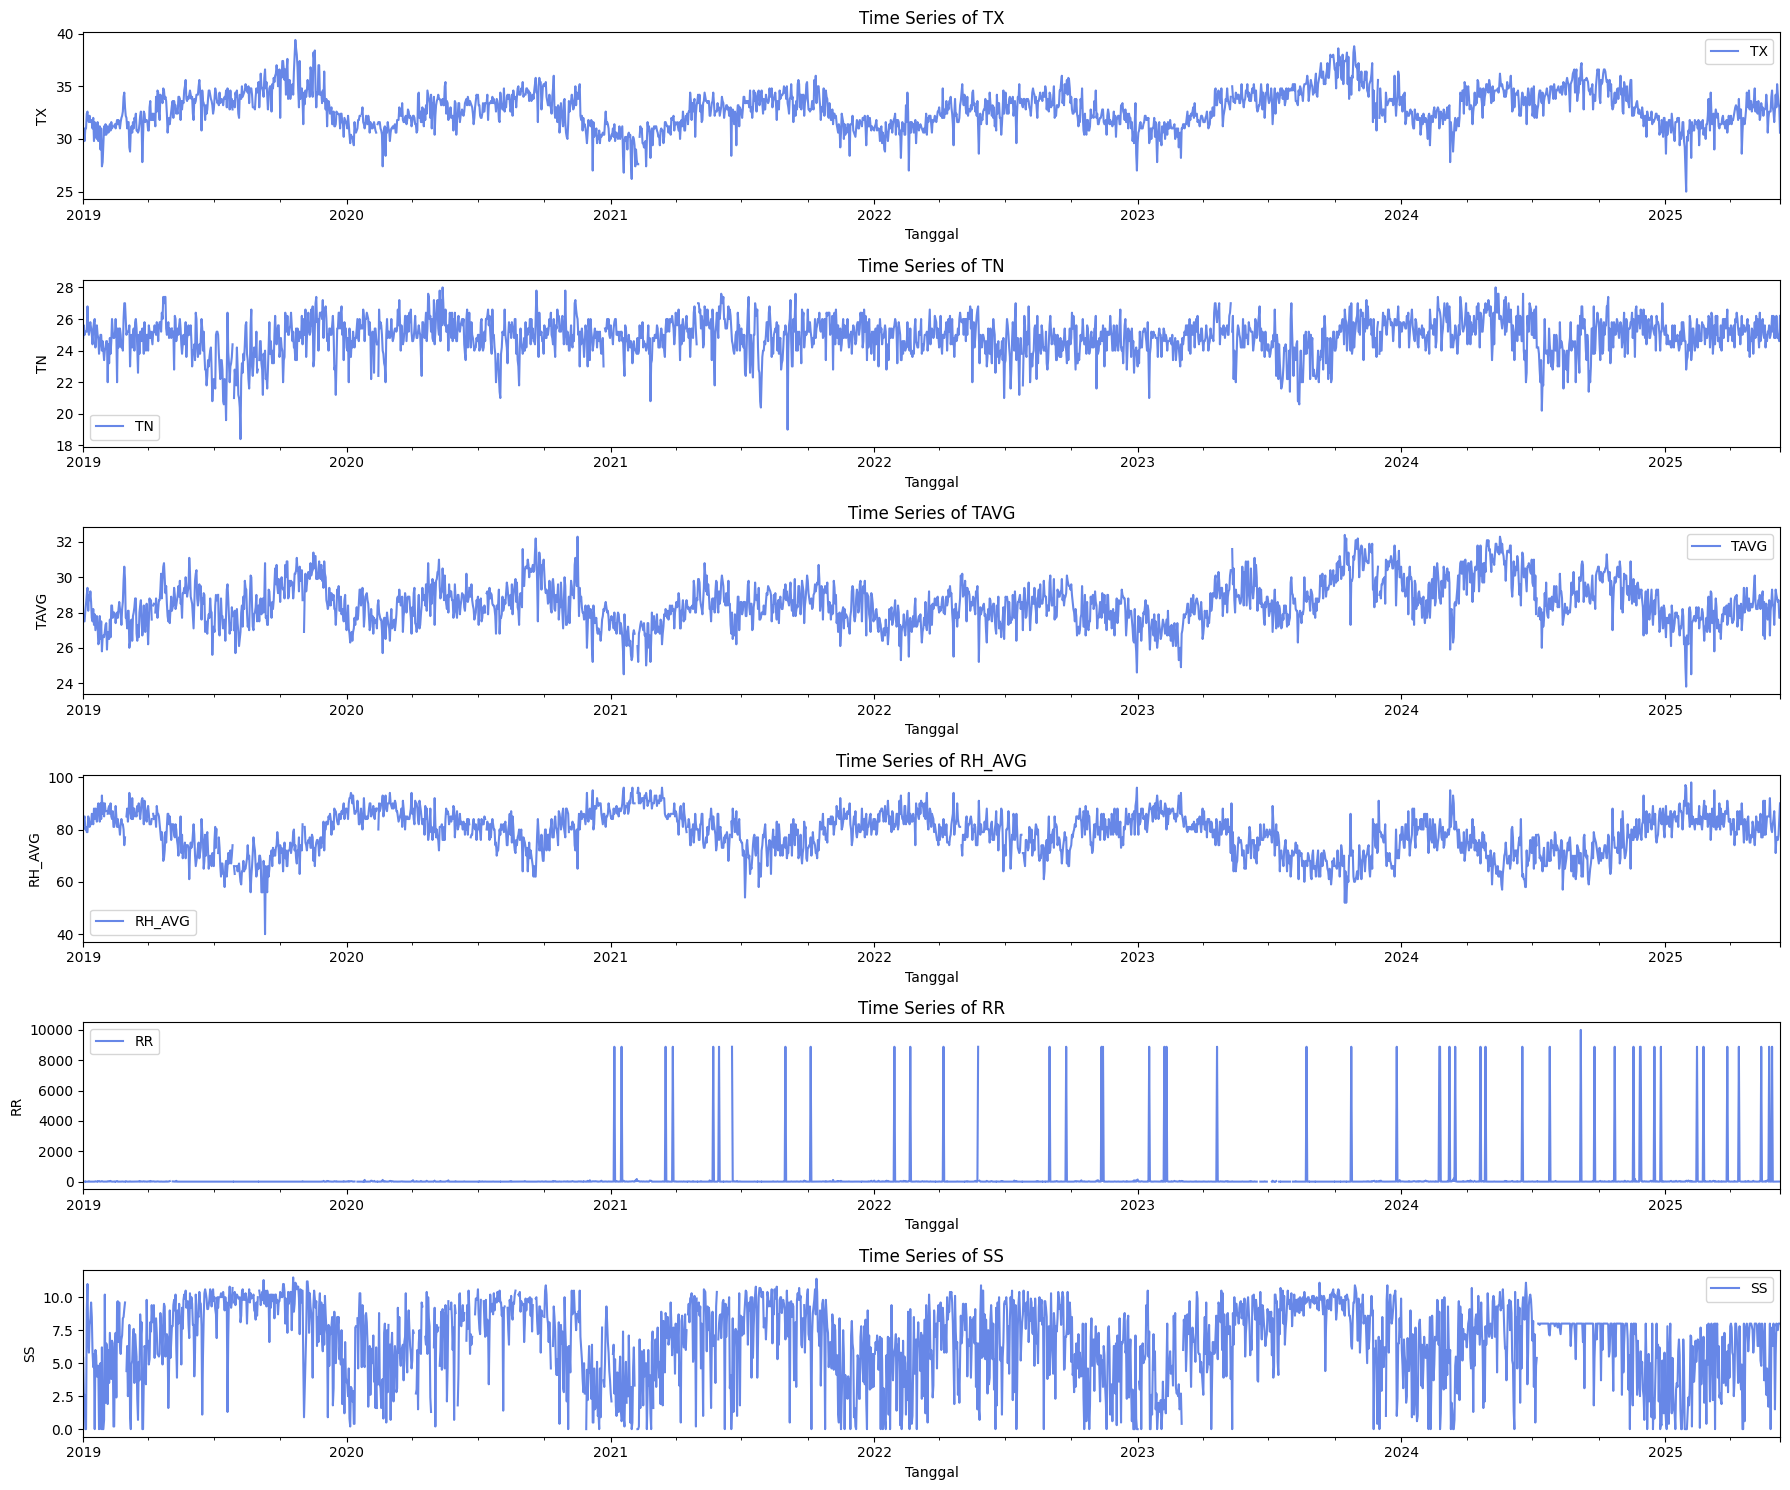

In [20]:
# C. Visualisasi Time Series untuk Variabel Cuaca Utama
print("\nVisualisasi Time Series Variabel Cuaca Utama (EDA)...")
main_weather_vars_eda = ['TX', 'TN', 'TAVG', 'RH_AVG', 'RR', 'SS']
plt.figure(figsize=(18, 15))
for i, var in enumerate(main_weather_vars_eda):
    if var in df_eda_input.columns:
        plt.subplot(len(main_weather_vars_eda), 1, i + 1)
        # Menggunakan warna biru yang konsisten untuk semua time series
        df_eda_input[var].plot(label=var, color=primary_blue_color, alpha=0.8)
        plt.title(f'Time Series of {var}')
        plt.ylabel(var)
        plt.xlabel('Tanggal')
        plt.legend()
plt.tight_layout()
plt.show()


Visualisasi Distribusi Fitur Numerik (EDA)...


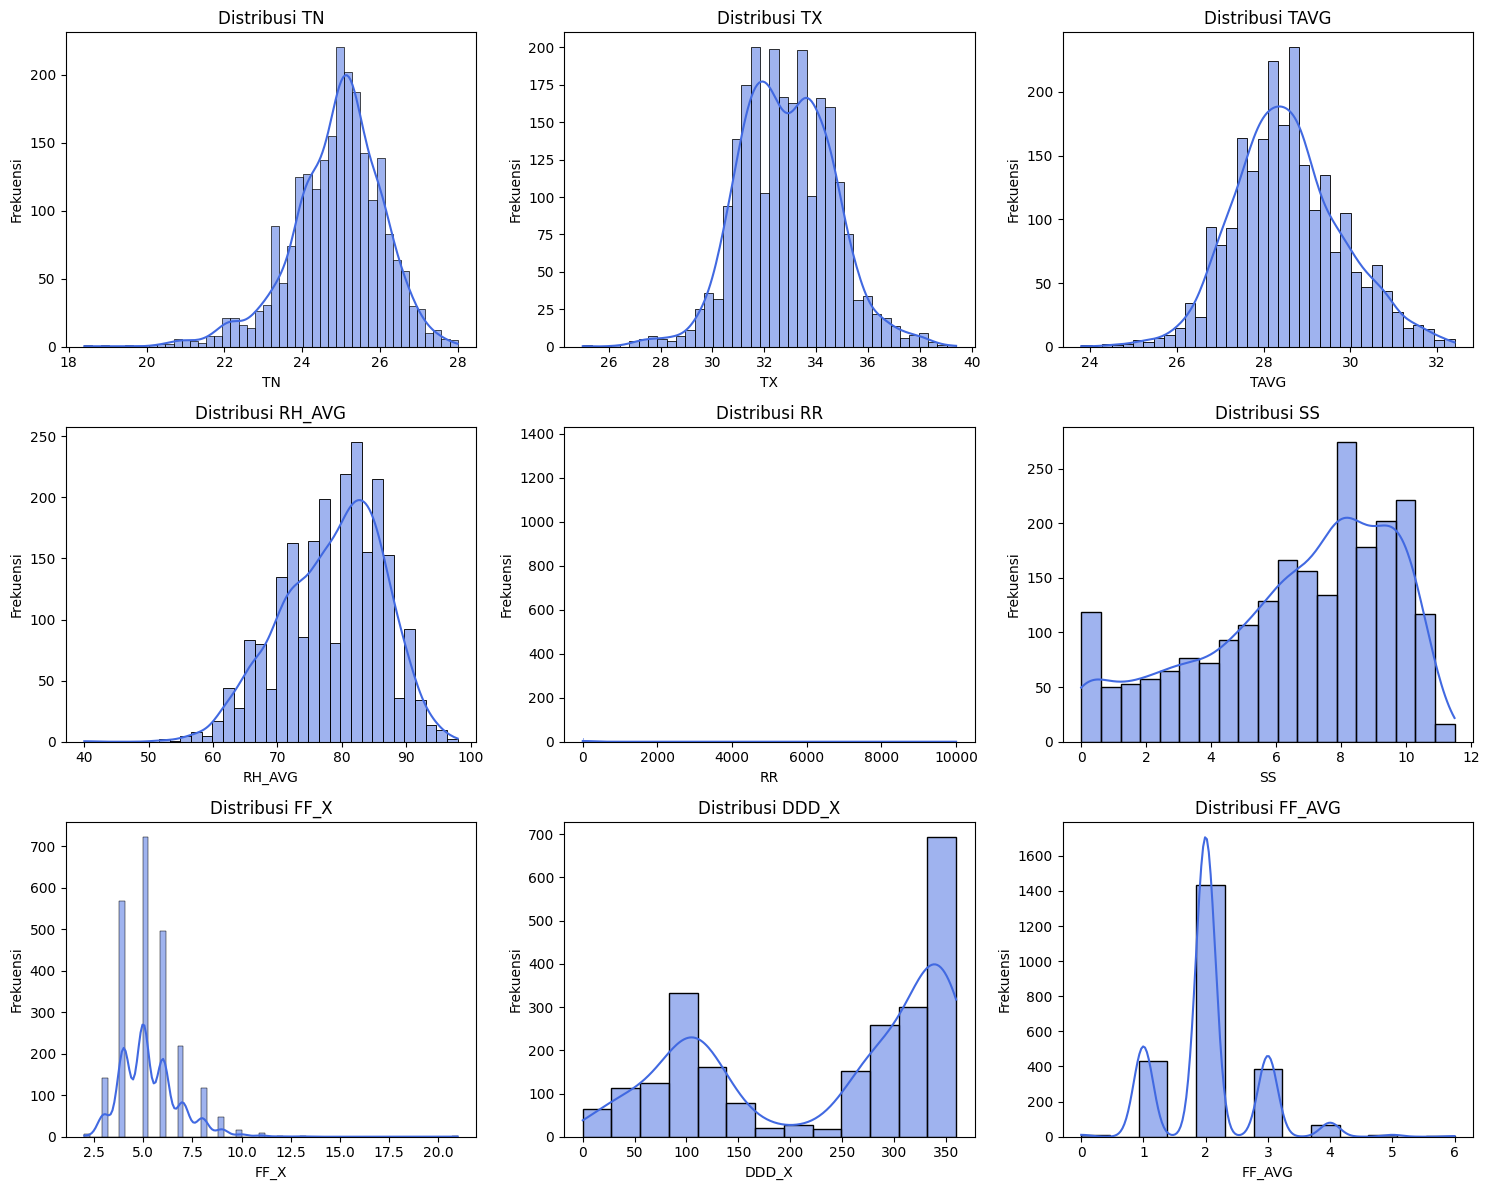

In [ ]:
# D. Visualisasi Distribusi Fitur Numerik
print("\nVisualisasi Distribusi Fitur Numerik (EDA)...")
numeric_features_for_dist_eda = df_eda_input.select_dtypes(include=np.number).columns
num_plots_dist = len(numeric_features_for_dist_eda)
cols_dist = 3
rows_dist = (num_plots_dist + cols_dist - 1) // cols_dist

plt.figure(figsize=(15, rows_dist * 4))
for i, col in enumerate(numeric_features_for_dist_eda):
    plt.subplot(rows_dist, cols_dist, i + 1)
    # Menggunakan warna biru untuk histogram
    sns.histplot(df_eda_input[col].dropna(), kde=True, color=primary_blue_color, line_kws={'color': 'darkblue'}) # KDE line bisa warna lebih gelap
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


Matriks Korelasi Fitur Numerik (EDA)...


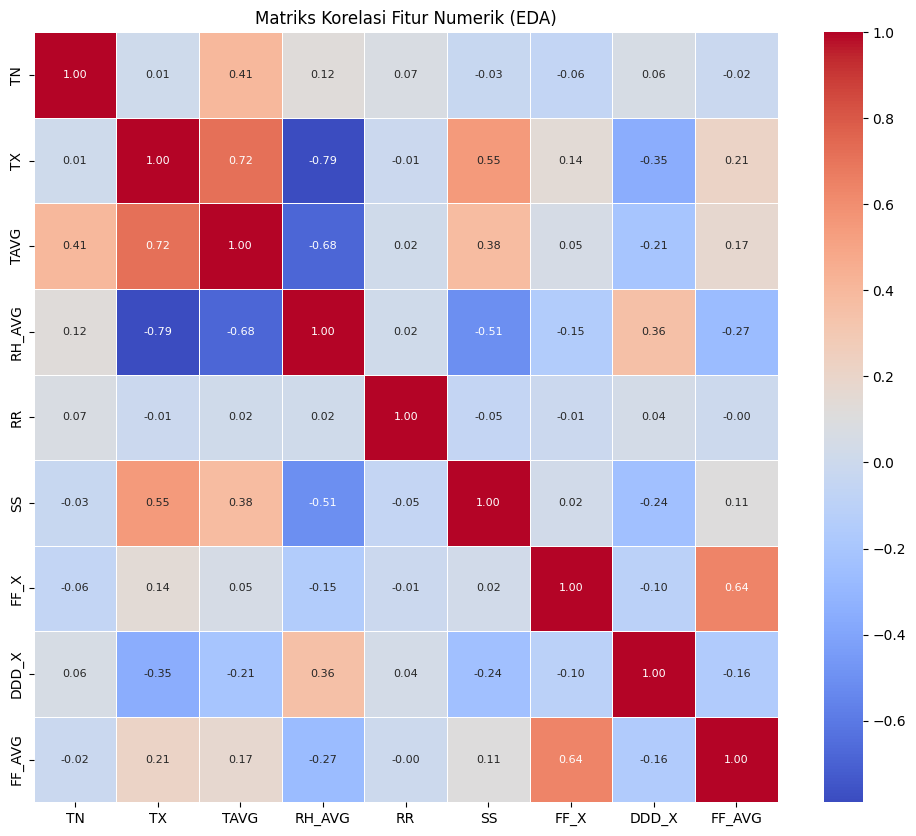

In [ ]:
# E. Matriks Korelasi
print("\nMatriks Korelasi Fitur Numerik (EDA)...")
numeric_df_for_corr = df_eda_input.select_dtypes(include=np.number)
correlation_matrix_eda = numeric_df_for_corr.corr()

plt.figure(figsize=(12, 10))
# cmap 'coolwarm' adalah standar yang baik untuk korelasi (merah-biru)
# Jika ingin dominan biru, bisa gunakan cmap='Blues' atau cmap='PuBu' (Purple-Blue)
# atau cmap='GnBu' (Green-Blue)
sns.heatmap(correlation_matrix_eda, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
# Jika ingin mencoba palet biru:
# sns.heatmap(correlation_matrix_eda, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriks Korelasi Fitur Numerik (EDA)')
plt.show()


Box Plot TX per Bulan (EDA)...


<ipython-input-11-04ad29941dbe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month_for_plot', y='TX', data=df_eda_input, palette="Set3")


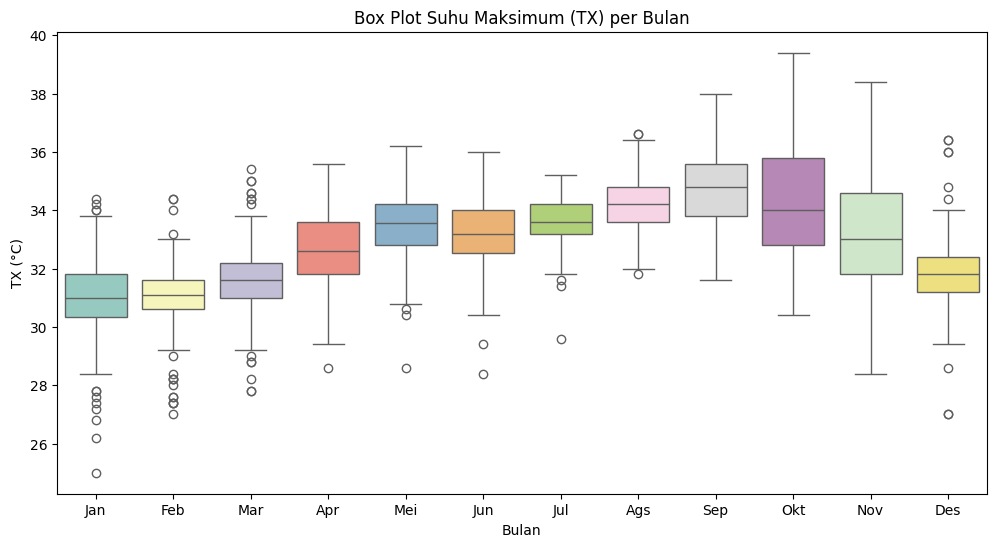

In [ ]:
# F. Box Plots untuk melihat pola musiman (Contoh: TX per bulan)
print("\nBox Plot TX per Bulan (EDA)...")
if 'TX' in df_eda_input.columns:
    # Buat kolom bulan sementara jika belum ada (dari index)
    df_eda_input['month_for_plot'] = df_eda_input.index.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='month_for_plot', y='TX', data=df_eda_input, palette="Set3")
    plt.title('Box Plot Suhu Maksimum (TX) per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel('TX (°C)')
    plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Ags','Sep','Okt','Nov','Des'])
    plt.show()
    # Hapus kolom sementara
    df_eda_input.drop('month_for_plot', axis=1, inplace=True, errors='ignore') # errors='ignore' jika sudah dihapus
else:
    print("Kolom 'TX' tidak ditemukan untuk Box Plot.")

# (Anda bisa menambahkan plot EDA lain di sini jika diperlukan, misalnya scatter plot antar variabel tertentu)


Scatter Plot TX vs TAVG (EDA)...


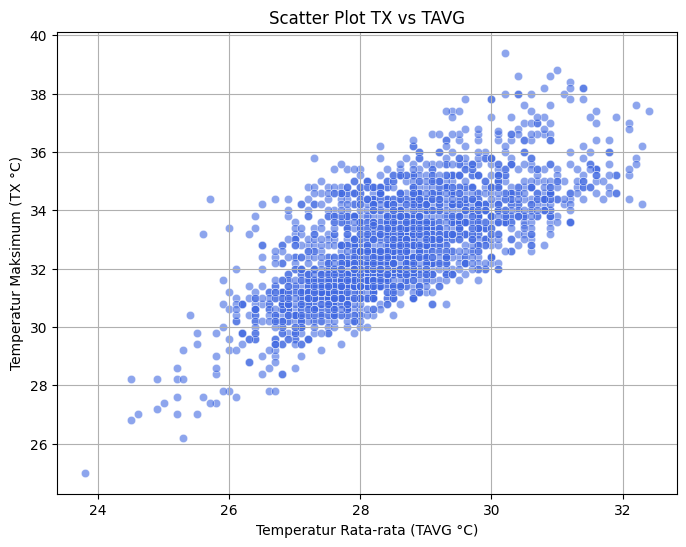

In [ ]:
# G. Scatter Plot (Contoh: TX vs TAVG)
print("\nScatter Plot TX vs TAVG (EDA)...")
if 'TX' in df_eda_input.columns and 'TAVG' in df_eda_input.columns:
    plt.figure(figsize=(8, 6))
    # Menggunakan warna biru untuk scatter plot
    sns.scatterplot(x='TAVG', y='TX', data=df_eda_input, alpha=0.6, color=primary_blue_color)
    plt.title('Scatter Plot TX vs TAVG')
    plt.xlabel('Temperatur Rata-rata (TAVG °C)')
    plt.ylabel('Temperatur Maksimum (TX °C)')
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'TX' atau 'TAVG' tidak ditemukan untuk Scatter Plot.")

In [ ]:
# --- Ekspor dan Unduh Data yang Digunakan untuk EDA (Hasil dari Bagian 2) ---
# Ini adalah df_eda_input, yang merupakan salinan dari df_raw setelah pembersihan awal.

csv_filename_bagian3 = 'hasil_bagian3_data_input_untuk_eda.csv'
print(f"\nMengekspor data input yang digunakan untuk EDA ke {csv_filename_bagian3}...")

# Pastikan index (Tanggal) diekspor
df_eda_input.to_csv(csv_filename_bagian3, index=True)
files.download(csv_filename_bagian3)
print(f"File {csv_filename_bagian3} siap diunduh.")

print("\n--- Exploratory Data Analysis (EDA) (Bagian 3) Selesai ---")

=

In [21]:
# --- 4. Data Preprocessing ---
print("\n--- Memulai Data Preprocessing (Bagian 4) ---")
# df_processed akan menjadi output dari Bagian 4
df_for_preprocessing = df_raw.copy() # Mulai dari data bersih Bagian 2

# Penanganan Nilai Hilang (Interpolasi)
print("\nJumlah nilai hilang SEBELUM interpolasi (Bagian 4):")
print(df_for_preprocessing.isnull().sum()[df_for_preprocessing.isnull().sum() > 0])
df_processed = df_for_preprocessing.copy()
for col in df_processed.select_dtypes(include=np.number).columns:
    df_processed[col] = df_processed[col].interpolate(method='linear', limit_direction='both')
print("\nJumlah nilai hilang SETELAH interpolasi (Bagian 4):")
missing_after_interpolation = df_processed.isnull().sum()
print(missing_after_interpolation[missing_after_interpolation > 0])
if missing_after_interpolation.sum() == 0:
    print("Semua nilai hilang numerik telah ditangani dengan interpolasi (Bagian 4).")
else:
    df_processed.dropna(inplace=True) # Langkah akhir jika masih ada
    print("Nilai hilang yang tersisa telah di-drop (Bagian 4).")


--- Memulai Data Preprocessing (Bagian 4) ---

Jumlah nilai hilang SEBELUM interpolasi (Bagian 4):
TN        10
TX         7
TAVG      13
RH_AVG    23
RR        60
SS        57
FF_X       1
DDD_X      1
FF_AVG     1
dtype: int64

Jumlah nilai hilang SETELAH interpolasi (Bagian 4):
Series([], dtype: int64)
Semua nilai hilang numerik telah ditangani dengan interpolasi (Bagian 4).


In [22]:
# Feature Engineering
print("\nMelakukan Feature Engineering (Bagian 4)...")
df_processed['Tx_target'] = df_processed['TX'].shift(-1)
lags_to_create = [1, 2, 3]
weather_features_for_lag = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
for feature in weather_features_for_lag:
    if feature in df_processed.columns:
        for lag in lags_to_create:
            df_processed[f'{feature}_lag{lag}'] = df_processed[feature].shift(lag)
df_processed['dayofweek'] = df_processed.index.dayofweek
df_processed['dayofyear'] = df_processed.index.dayofyear
df_processed['month'] = df_processed.index.month
df_processed['year'] = df_processed.index.year

# Menghapus baris dengan NaN yang dihasilkan oleh shift
rows_before_dropna_fe = len(df_processed)
df_processed.dropna(inplace=True)
rows_after_dropna_fe = len(df_processed)
print(f"\nMenghapus baris dengan NaN hasil dari shift (Bagian 4). Jumlah baris berkurang dari {rows_before_dropna_fe} menjadi {rows_after_dropna_fe}.")

print("\nData setelah Preprocessing (akhir Bagian 4):")
print(df_processed.head())


Melakukan Feature Engineering (Bagian 4)...

Menghapus baris dengan NaN hasil dari shift (Bagian 4). Jumlah baris berkurang dari 2352 menjadi 2348.

Data setelah Preprocessing (akhir Bagian 4):
              TN    TX  TAVG  RH_AVG   RR    SS  FF_X  DDD_X  FF_AVG  \
TANGGAL                                                                
2019-01-04  25.2  31.0  28.1    80.0  0.8   0.0   6.0   10.0     2.0   
2019-01-05  25.2  31.0  28.5    81.0  0.0   0.0   5.0  340.0     2.0   
2019-01-06  25.2  32.4  29.0    79.0  0.0   9.0   6.0  320.0     2.0   
2019-01-07  26.8  32.6  29.4    79.0  0.0  11.0   5.0  360.0     2.0   
2019-01-08  25.4  31.8  28.1    85.0  0.0   6.8   5.0  360.0     1.0   

            Tx_target  ...  DDD_X_lag1  DDD_X_lag2  DDD_X_lag3  FF_AVG_lag1  \
TANGGAL                ...                                                    
2019-01-04       31.0  ...        10.0       270.0       350.0          1.0   
2019-01-05       32.4  ...        10.0        10.0       270.0 

In [ ]:
# Ekspor dan Unduh Data Hasil Bagian 4
csv_filename_bagian4 = 'hasil_bagian4_data_setelah_preprocessing.csv'
print(f"\nMengekspor data setelah preprocessing ke {csv_filename_bagian4}...")
df_processed.to_csv(csv_filename_bagian4, index=True)
files.download(csv_filename_bagian4)
print(f"File {csv_filename_bagian4} siap diunduh.")

print("\n--- Data Preprocessing (Bagian 4) Selesai ---")


Mengekspor data setelah preprocessing ke hasil_bagian4_data_setelah_preprocessing.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian4_data_setelah_preprocessing.csv siap diunduh.

--- Data Preprocessing (Bagian 4) Selesai ---


=

In [23]:
# --- 5. Pembagian Data (Splitting Data secara kronologis untuk time series) ---
print("\n--- Memulai Pembagian Data (Splitting Data) (Bagian 5) ---")

if 'Tx_target' not in df_processed.columns:
    print("Kolom 'Tx_target' tidak ditemukan. Pastikan Feature Engineering telah dilakukan.")
else:
    X = df_processed.drop('Tx_target', axis=1)
    y = df_processed['Tx_target']
    train_size_percentage = 0.8
    train_samples = int(len(df_processed) * train_size_percentage)
    X_train = X.iloc[:train_samples]
    y_train = y.iloc[:train_samples]
    X_test = X.iloc[train_samples:]
    y_test = y.iloc[train_samples:]

    print(f"\nJumlah total sampel setelah preprocessing: {len(df_processed)}")
    print(f"Jumlah sampel training (X_train, y_train): {len(X_train)}")
    print(f"Jumlah sampel testing (X_test, y_test): {len(X_test)}")

print("\n--- Pembagian Data (Bagian 5) Selesai ---")
print("Variabel X_train, y_train, X_test, y_test siap digunakan dan telah diekspor.")


--- Memulai Pembagian Data (Splitting Data) (Bagian 5) ---

Jumlah total sampel setelah preprocessing: 2348
Jumlah sampel training (X_train, y_train): 1878
Jumlah sampel testing (X_test, y_test): 470

--- Pembagian Data (Bagian 5) Selesai ---
Variabel X_train, y_train, X_test, y_test siap digunakan dan telah diekspor.


In [12]:
# Ekspor dan Unduh Data Hasil Bagian 5
# Kita akan mengekspor X_train, y_train, X_test, y_test secara terpisah
csv_filename_X_train = 'hasil_bagian5_X_train.csv'
csv_filename_y_train = 'hasil_bagian5_y_train.csv'
csv_filename_X_test = 'hasil_bagian5_X_test.csv'
csv_filename_y_test = 'hasil_bagian5_y_test.csv'

print(f"\nMengekspor X_train ke {csv_filename_X_train}...")
X_train.to_csv(csv_filename_X_train, index=True)
files.download(csv_filename_X_train)
print(f"File {csv_filename_X_train} siap diunduh.")

print(f"\nMengekspor y_train ke {csv_filename_y_train}...")
y_train.to_csv(csv_filename_y_train, index=True, header=['Tx_target']) # Tambah header jika y_train adalah Series
files.download(csv_filename_y_train)
print(f"File {csv_filename_y_train} siap diunduh.")

print(f"\nMengekspor X_test ke {csv_filename_X_test}...")
X_test.to_csv(csv_filename_X_test, index=True)
files.download(csv_filename_X_test)
print(f"File {csv_filename_X_test} siap diunduh.")

print(f"\nMengekspor y_test ke {csv_filename_y_test}...")
y_test.to_csv(csv_filename_y_test, index=True, header=['Tx_target']) # Tambah header jika y_test adalah Series
files.download(csv_filename_y_test)
print(f"File {csv_filename_y_test} siap diunduh.")


Mengekspor X_train ke hasil_bagian5_X_train.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian5_X_train.csv siap diunduh.

Mengekspor y_train ke hasil_bagian5_y_train.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian5_y_train.csv siap diunduh.

Mengekspor X_test ke hasil_bagian5_X_test.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian5_X_test.csv siap diunduh.

Mengekspor y_test ke hasil_bagian5_y_test.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File hasil_bagian5_y_test.csv siap diunduh.


=

In [24]:
# --- 6. Pelatihan Model (Random Forest Regressor) ---
print("\n--- Memulai Pelatihan Model (Random Forest Regressor) ---")

# Import library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import MinMaxScaler # Jika Anda memutuskan untuk menggunakan normalisasi
import joblib # Untuk menyimpan model
from google.colab import files # Untuk mengunduh file

# (Opsional) Normalisasi Fitur (seperti kode sebelumnya)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("\nModel Random Forest Regressor telah diinisialisasi dengan parameter:")
print(rf_model.get_params())

# Latih model menggunakan data training
print("\nMelatih model...")
model_trained_successfully = False
try:
    # Jika menggunakan normalisasi:
    # rf_model.fit(X_train_scaled, y_train)
    rf_model.fit(X_train, y_train)
    print("Model berhasil dilatih.")
    model_trained_successfully = True
except Exception as e:
    print(f"Error saat melatih model: {e}")
    print("Pastikan X_train dan y_train tidak mengandung nilai NaN dan formatnya benar.")

# (Opsional) Tampilkan Feature Importances (seperti kode sebelumnya)
if model_trained_successfully and hasattr(rf_model, 'feature_importances_'):
    print("\nFeature Importances:")
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Visualisasi (opsional, bisa di-skip jika hanya ingin download)
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # plt.figure(figsize=(12, 8))
    # sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20)) # Tampilkan top 20
    # plt.title('Top 20 Feature Importances dari Random Forest')
    # plt.tight_layout()
    # plt.show()
    print(feature_importance_df.head(10)) # Tampilkan 10 teratas
else:
    if model_trained_successfully:
        print("Tidak dapat mengambil feature importances.")

print("\n--- Pelatihan Model Selesai ---")

# --- Menyimpan dan Mengunduh Model ---
if model_trained_successfully:
    print("\n--- Menyimpan dan Mengunduh Model ---")
    # Tentukan nama file untuk model
    model_filename = 'random_forest_tx_semarang_model.joblib'

    # Simpan model yang sudah dilatih menggunakan joblib
    # Joblib lebih efisien untuk objek Python besar seperti model scikit-learn
    joblib.dump(rf_model, model_filename)
    print(f"\nModel berhasil disimpan sebagai '{model_filename}' di environment Colab.")

    # (Opsional) Jika Anda menggunakan scaler dan ingin menyimpannya juga:
    # scaler_filename = 'minmax_scaler_tx_semarang.joblib'
    # joblib.dump(scaler, scaler_filename) # Pastikan 'scaler' adalah variabel scaler Anda
    # print(f"Scaler berhasil disimpan sebagai '{scaler_filename}' di environment Colab.")
    # print(f"Anda bisa mengunduh scaler dengan: files.download('{scaler_filename}')")

    # Tawarkan untuk mengunduh file model
    print(f"\nMemulai proses unduh untuk '{model_filename}'...")
    try:
        files.download(model_filename)
        print(f"File '{model_filename}' seharusnya mulai diunduh ke browser Anda.")
    except Exception as e:
        print(f"Gagal mengunduh file '{model_filename}': {e}")
        print("Anda mungkin perlu mencari file tersebut di panel file Colab (sebelah kiri) dan mengunduhnya secara manual.")
else:
    print("\nModel tidak dilatih dengan sukses, jadi tidak ada model untuk disimpan atau diunduh.")


--- Memulai Pelatihan Model (Random Forest Regressor) ---

Model Random Forest Regressor telah diinisialisasi dengan parameter:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Melatih model...
Model berhasil dilatih.

Feature Importances:
        feature  importance
1            TX    0.608163
12      TX_lag1    0.038659
37    dayofyear    0.026522
13      TX_lag2    0.025815
14      TX_lag3    0.023697
3        RH_AVG    0.023308
2          TAVG    0.014998
19  RH_AVG_lag2    0.013831
26      SS_lag3    0.012488
24      SS_lag1    0.011679

--- Pelatihan Model Selesai ---

--- Menyimpan dan Mengunduh Model ---

Model berhasil disimpan sebaga

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File 'random_forest_tx_semarang_model.joblib' seharusnya mulai diunduh ke browser Anda.


=

In [25]:
# --- 7. Evaluasi Model ---
print("\n--- Memulai Evaluasi Model ---")

# Import library metrik evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih baik

# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    Menghindari division by zero dengan mengganti y_true == 0 dengan nilai kecil (epsilon)
    atau dengan mengabaikan sampel di mana y_true == 0.
    Untuk suhu, y_true == 0 sangat jarang, tapi praktik yang baik.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Opsi 3: Filter out y_true == 0 (lebih aman untuk MAPE)
    mask = y_true != 0
    if not np.all(mask):
         print(f"Peringatan: {np.sum(~mask)} nilai aktual adalah nol dan akan diabaikan dalam perhitungan MAPE.")

    if np.sum(mask) == 0: # Jika semua nilai aktual adalah nol
        return np.nan # Tidak bisa menghitung MAPE

    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


if 'rf_model' not in globals() or not hasattr(rf_model, 'predict'):
    print("Model 'rf_model' belum dilatih atau tidak ditemukan. Jalankan langkah pelatihan terlebih dahulu.")
else:
    print("\nMelakukan prediksi pada data test...")
    try:
        # Lakukan prediksi pada X_test
        # Jika Anda menggunakan normalisasi pada X_test (X_test_scaled), gunakan itu di sini:
        # y_pred = rf_model.predict(X_test_scaled)
        y_pred = rf_model.predict(X_test)
        print("Prediksi pada data test berhasil dilakukan.")

        # Hitung metrik evaluasi
        print("\nMetrik Evaluasi Model:")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse) # Akar dari MSE
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        print(f"  Mean Absolute Error (MAE):          {mae:.4f} °C")
        print(f"  Mean Squared Error (MSE):         {mse:.4f}")
        print(f"  Root Mean Squared Error (RMSE):   {rmse:.4f} °C")
        print(f"  R-squared (R²):                   {r2:.4f}")
        if not np.isnan(mape):
            print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
        else:
            print("  Mean Absolute Percentage Error (MAPE): Tidak dapat dihitung (mungkin semua y_true adalah 0).")

        # Penjelasan singkat metrik:
        # MAE: Rata-rata selisih absolut antara nilai aktual dan prediksi. Semakin kecil semakin baik.
        # MSE: Rata-rata kuadrat selisih. Memberikan bobot lebih pada kesalahan besar. Semakin kecil semakin baik.
        # RMSE: Akar dari MSE. Dalam unit yang sama dengan target, lebih mudah diinterpretasikan. Semakin kecil semakin baik.
        # R²: Proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen. Berkisar -inf hingga 1. Semakin dekat ke 1 semakin baik.
        # MAPE: Rata-rata persentase selisih absolut. Berguna untuk memahami kesalahan relatif. Semakin kecil semakin baik.

    except Exception as e:
        print(f"Error saat melakukan evaluasi model: {e}")

print("\n--- Evaluasi Model Selesai ---")


--- Memulai Evaluasi Model ---

Melakukan prediksi pada data test...
Prediksi pada data test berhasil dilakukan.

Metrik Evaluasi Model:
  Mean Absolute Error (MAE):          0.7588 °C
  Mean Squared Error (MSE):         1.0129
  Root Mean Squared Error (RMSE):   1.0064 °C
  R-squared (R²):                   0.6718
  Mean Absolute Percentage Error (MAPE): 2.31%

--- Evaluasi Model Selesai ---



Visualisasi Hasil Prediksi vs Aktual pada Data Test...


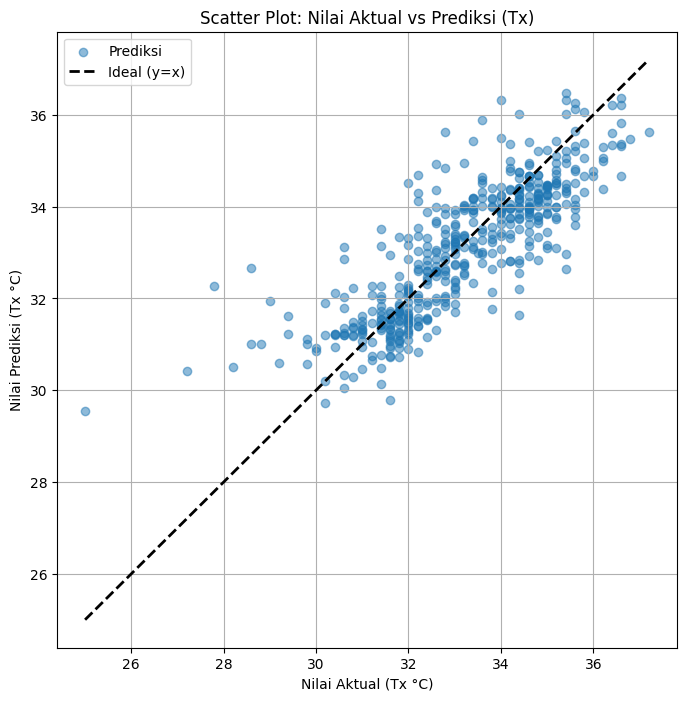

In [26]:
# Visualisasi Hasil Prediksi vs Aktual
print("\nVisualisasi Hasil Prediksi vs Aktual pada Data Test...")

# 1. Scatter Plot: Prediksi vs Aktual
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal (y=x)') # Garis diagonal y=x
plt.xlabel('Nilai Aktual (Tx °C)')
plt.ylabel('Nilai Prediksi (Tx °C)')
plt.title('Scatter Plot: Nilai Aktual vs Prediksi (Tx)')
plt.legend()
plt.grid(True)
plt.show()

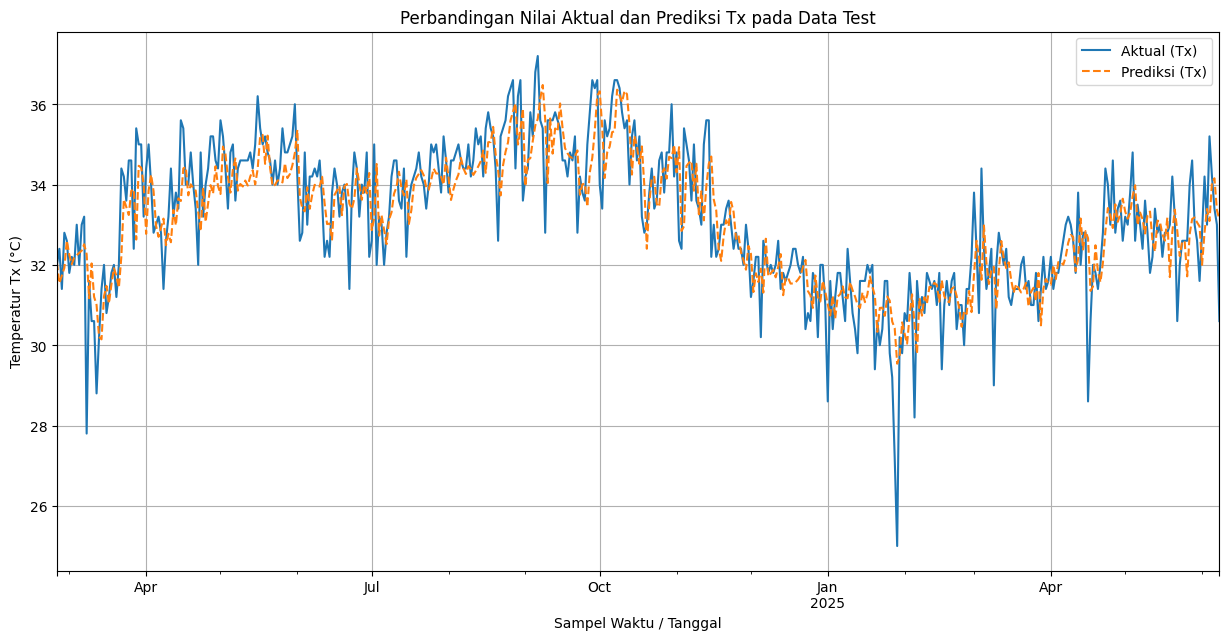

In [27]:
# 2. Plot Garis: Prediksi dan Aktual terhadap Waktu (Indeks Data Test)
results_df = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})
if isinstance(X_test.index, pd.DatetimeIndex):
    results_df.index = X_test.index # Gunakan indeks tanggal dari X_test jika datetime
else:
    # Jika X_test.index bukan DatetimeIndex, buat range tanggal sederhana untuk plot
    # Ini mungkin terjadi jika index direset atau tidak di-set dengan benar
    print("Peringatan: X_test.index bukan DatetimeIndex. Plot waktu mungkin tidak akurat.")
    results_df.index = pd.date_range(start=pd.Timestamp('today') - pd.Timedelta(days=len(X_test)-1), periods=len(X_test), freq='D')


plt.figure(figsize=(15, 7))
results_df['Aktual'].plot(label='Aktual (Tx)', legend=True)
results_df['Prediksi'].plot(label='Prediksi (Tx)', legend=True, linestyle='--')
plt.title('Perbandingan Nilai Aktual dan Prediksi Tx pada Data Test')
plt.xlabel('Sampel Waktu / Tanggal')
plt.ylabel('Temperatur Tx (°C)')
plt.legend()
plt.grid(True)
plt.show()

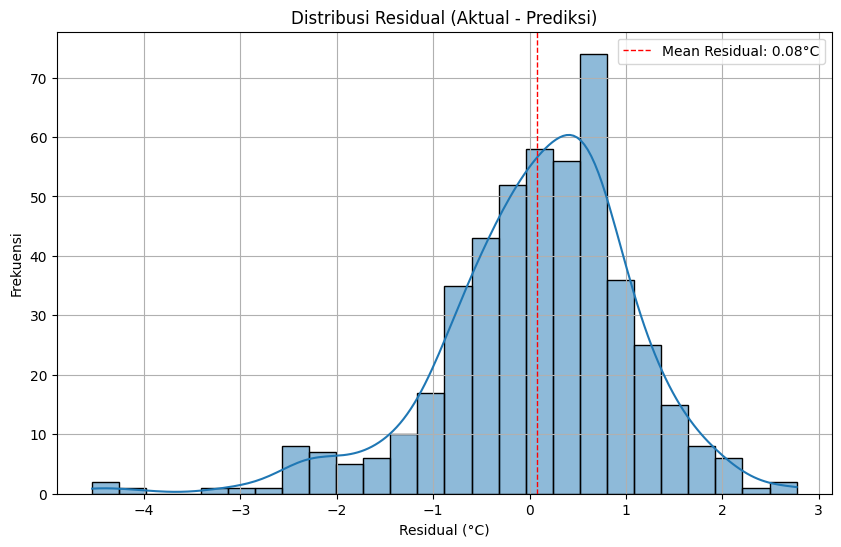

Rata-rata Residual: 0.0758°C
Standar Deviasi Residual: 1.0046°C


In [28]:
# (Opsional) Plot Distribusi Residual
# Residual adalah selisih antara nilai aktual dan prediksi (y_test - y_pred)
# Idealnya, residual terdistribusi normal di sekitar nol.

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual (Aktual - Prediksi)')
plt.xlabel('Residual (°C)')
plt.ylabel('Frekuensi')
plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=1, label=f'Mean Residual: {residuals.mean():.2f}°C')
plt.legend()
plt.grid(True)
plt.show()
print(f"Rata-rata Residual: {residuals.mean():.4f}°C")
print(f"Standar Deviasi Residual: {residuals.std():.4f}°C")

=

In [29]:
# --- 8. Prediksi untuk N hari ke depan (Iterative Forecasting) ---
print("\n--- Memulai Prediksi untuk N Hari ke Depan (Iterative Forecasting) ---")

import pandas as pd
from datetime import datetime, timedelta

# Fungsi untuk membuat fitur input berdasarkan data hari sebelumnya
def create_input_features(last_known_data_series, date_to_predict, feature_columns, lags_to_create):
    """
    Membuat DataFrame dengan satu baris fitur untuk prediksi satu hari.
    Args:
        last_known_data_series (pd.Series): Series pandas berisi data cuaca terakhir yang diketahui (indeks adalah nama fitur asli seperti 'TX', 'TN').
        date_to_predict (datetime): Tanggal yang ingin diprediksi.
        feature_columns (pd.Index): Kolom-kolom yang diharapkan oleh model (dari X_train.columns).
        lags_to_create (list): Daftar lag yang digunakan saat training (misal [1, 2, 3]).
    Returns:
        pd.DataFrame: DataFrame dengan satu baris fitur.
    """
    input_features = pd.Series(index=feature_columns, dtype='float64')

    # Isi fitur lag
    # Asumsi: last_known_data_series berisi nilai-nilai untuk t-1, t-2, t-3 relatif terhadap 'date_to_predict'
    # Ini perlu disesuaikan jika struktur `last_known_data_series` berbeda.
    # Untuk implementasi yang lebih robust, `last_known_data_series` bisa berupa DataFrame beberapa hari terakhir.
    # Di sini kita sederhanakan, asumsi `last_known_data_series` adalah nilai H-1 dari hari yang akan diprediksi.

    # Fitur lag yang dibutuhkan model (misal TX_lag1, TN_lag1, dst.)
    # Kolom asli yang menjadi dasar lag (misal TX, TN, dst.)
    original_weather_features = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']

    # Untuk lag sederhana ini, kita asumsikan last_known_data_series adalah data H-1
    # dan kita hanya mengisi lag1. Untuk lag2, lag3 kita butuh data H-2, H-3
    # Ini adalah penyederhanaan. Idealnya, Anda harus mengelola histori beberapa hari terakhir.
    for feature_orig in original_weather_features:
        for lag in lags_to_create:
            lag_col_name = f'{feature_orig}_lag{lag}'
            if lag_col_name in input_features.index:
                # Ini adalah bagian yang perlu logika lebih canggih
                # Untuk demo, kita isi lag1 dari last_known_data_series
                # dan lag lainnya bisa NaN atau diisi dari histori yang lebih panjang
                if lag == 1 and feature_orig in last_known_data_series.index:
                    input_features[lag_col_name] = last_known_data_series[feature_orig]
                # else:
                    # input_features[lag_col_name] = np.nan # atau ambil dari histori
                    # Untuk demo, biarkan NaN jika tidak lag 1. Model akan menangani ini jika dilatih dengan benar
                    # atau kita perlu memastikan semua lag terisi.

    # Isi fitur berbasis tanggal
    input_features['dayofweek'] = date_to_predict.dayofweek
    input_features['dayofyear'] = date_to_predict.dayofyear
    input_features['month'] = date_to_predict.month
    input_features['year'] = date_to_predict.year
    # if 'weekofyear' in input_features.index: # Sesuaikan jika Anda menggunakan weekofyear
    #     input_features['weekofyear'] = date_to_predict.isocalendar().week

    # Mengubah Series menjadi DataFrame dengan satu baris
    return pd.DataFrame([input_features])


# --- Input dari Pengguna ---
# Tanggal mulai prediksi (misalnya hari ini)
while True:
    start_date_str = input("Masukkan tanggal mulai prediksi (YYYY-MM-DD), misal hari ini: ")
    try:
        start_date_dt = datetime.strptime(start_date_str, '%Y-%m-%d')
        break
    except ValueError:
        print("Format tanggal salah. Gunakan YYYY-MM-DD.")

# Jumlah hari ke depan yang ingin diprediksi
while True:
    try:
        days_to_predict_input = int(input("Masukkan jumlah hari ke depan yang ingin diprediksi (1-7): "))
        if 1 <= days_to_predict_input <= 7:
            break
        else:
            print("Jumlah hari harus antara 1 dan 7.")
    except ValueError:
        print("Masukkan angka yang valid.")

# --- Persiapan Data Terakhir yang Diketahui ---
# Dapatkan data terakhir dari df_processed (data yang sudah bersih dan ada fitur lagnya)
# Kita butuh nilai aktual terakhir untuk memulai prediksi iteratif
if 'df_processed' not in globals() or df_processed.empty:
    print("DataFrame 'df_processed' tidak ditemukan atau kosong. Jalankan EDA & Preprocessing.")
else:
    # Ambil baris terakhir dari X (fitur input) sebelum target di-drop
    # Ini merepresentasikan data H-1 yang fiturnya sudah lengkap (termasuk lag)
    # Untuk memulai, kita butuh nilai aktual dari variabel cuaca H-1, H-2, ... H-max_lag
    # Untuk penyederhanaan, kita akan coba ambil data aktual terakhir dari df (sebelum feature engineering lag)

    # Kita butuh data mentah terakhir untuk mengisi 'last_known_values_for_iteration'
    # Ini harus berisi nilai-nilai untuk TN, TX, TAVG, dll. (bukan kolom lag)
    # Use df_processed instead of df
    last_actual_day_data = df_processed.iloc[-1].copy() # Ambil dari df_processed
    print(f"\nData aktual terakhir yang digunakan sebagai basis (dari df_processed tanggal {last_actual_day_data.name.strftime('%Y-%m-%d')}):")
    print(last_actual_day_data)

    # Kolom fitur yang diharapkan model (dari X_train)
    model_feature_columns = X_train.columns
    lags_used_in_training = [1, 2, 3] # Sesuaikan dengan yang Anda gunakan di feature engineering

# --- Proses Prediksi Iteratif ---
future_predictions_tx = []
current_date_to_predict = start_date_dt # This is a datetime.datetime object

# This is the Series that we will update in each iteration
# Initialized with the last actual day's data
# The keys are the original feature names (TX, TN, etc.)
last_known_values_for_iteration = last_actual_day_data.copy()
# Ensure all columns exist, if not in last_actual_day_data, fill with NaN or mean
for col in ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']:
    if col not in last_known_values_for_iteration:
        last_known_values_for_iteration[col] = df_processed[col].mean() # Use df_processed here

print(f"\nMemulai prediksi iteratif untuk {days_to_predict_input} hari dari {start_date_dt.strftime('%Y-%m-%d')}")

for i in range(days_to_predict_input):
    print(f"\nMemprediksi untuk hari ke-{i+1}: {current_date_to_predict.strftime('%Y-%m-%d')}")

    # Convert to Pandas Timestamp to access dayofweek, dayofyear, etc.
    current_timestamp_to_predict = pd.Timestamp(current_date_to_predict)

    # 1. Buat fitur input untuk tanggal saat ini
    input_data_dict = {}
    # Fitur tanggal
    input_data_dict['dayofweek'] = current_timestamp_to_predict.dayofweek
    input_data_dict['dayofyear'] = current_timestamp_to_predict.dayofyear
    input_data_dict['month'] = current_timestamp_to_predict.month
    input_data_dict['year'] = current_timestamp_to_predict.year

    # Fitur lag (this is the trickiest part and requires managing history)
    # We assume `last_known_values_for_iteration` is H-1
    # For lag1:
    for feature_orig in ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']:
        if f'{feature_orig}_lag1' in model_feature_columns:
            input_data_dict[f'{feature_orig}_lag1'] = last_known_values_for_iteration.get(feature_orig, df_processed[feature_orig].mean()) # default to mean if not available

    # For lag2, lag3, etc. you need to take from further history
    # Example for lag2 (requires data from H-2, which is not directly updated in this loop)
    # This is a big simplification and will affect accuracy.
    # For the demo, we can try to get it from df_processed if the date matches, or set a default.
    # This is the main area for improvement.
    # Let's try to build input_df_single_day more explicitly here
    # (Keep the explicit construction as you have it)


    # Build the DataFrame from the dict, ensuring the column order is the same as X_train
    input_df_single_day = pd.DataFrame([input_data_dict], columns=model_feature_columns)

    # Fill any remaining NaNs with the mean from the training set (simple strategy)
    for col in input_df_single_day.columns:
        if input_df_single_day[col].isnull().any():
            if col in X_train.columns: # Ensure the column is in the training set
                input_df_single_day[col] = input_df_single_day[col].fillna(X_train[col].mean())
            else:
                input_df_single_day[col] = input_df_single_day[col].fillna(0) # Default if not in training (should not happen)

    print("Fitur input yang disiapkan untuk prediksi:")
    print(input_df_single_day)

    # (Optional) If using a scaler, transform input_df_single_day
    # input_df_scaled = scaler.transform(input_df_single_day)
    # predicted_tx_value = rf_model.predict(input_df_scaled)[0]

    # 2. Perform TX prediction for the current date
    try:
        predicted_tx_value = rf_model.predict(input_df_single_day)[0]
        future_predictions_tx.append({'Tanggal': current_date_to_predict.strftime('%Y-%m-%d'), 'Prediksi_Tx': round(predicted_tx_value, 2)})
        print(f"Prediksi Tx untuk {current_date_to_predict.strftime('%Y-%m-%d')}: {predicted_tx_value:.2f}°C")

        # 3. Update 'last_known_values_for_iteration' with the latest predicted value
        # This is IMPORTANT for the next iteration
        # Simple assumption: we only update TX.
        # Ideally, you also predict TN, TAVG, RH_AVG, etc. and update them.
        last_known_values_for_iteration['TX'] = predicted_tx_value

        # If you have models for other features, predict and update them here:
        # last_known_values_for_iteration['TN'] = predicted_tn_value
        # last_known_values_for_iteration['TAVG'] = predicted_tavg_value
        # ... and so on

        # If no other models, other lagged features will use values from previous iterations or default values.
        # For features like RR (rainfall) or SS (sunshine), predicting them is difficult.
        # You can use historical average values or 0 as assumptions.
        # For example, assume RR and SS are 0 for the next day if there is no model.
        last_known_values_for_iteration['RR'] = last_known_values_for_iteration.get('RR_lag1', 0) if 'RR_lag1' in input_df_single_day else 0
        last_known_values_for_iteration['SS'] = last_known_values_for_iteration.get('SS_lag1', df_processed['SS'].mean()) if 'SS_lag1' in input_df_single_day else df_processed['SS'].mean()
        # And so on for other features required by the `rf_model` as lags

    except Exception as e:
        print(f"Error saat memprediksi untuk {current_date_to_predict.strftime('%Y-%m-%d')}: {e}")
        future_predictions_tx.append({'Tanggal': current_date_to_predict.strftime('%Y-%m-%d'), 'Prediksi_Tx': 'Error'})
        # If error, stop further predictions as the next input will be invalid
        break

    # Move to the next day
    current_date_to_predict += timedelta(days=1)

# Display the N-day prediction results
print("\n--- Hasil Prediksi N Hari ke Depan ---")
if future_predictions_tx:
    results_n_days_df = pd.DataFrame(future_predictions_tx)
    print(results_n_days_df)
else:
    print("Tidak ada prediksi yang dihasilkan.")

print("\n--- Prediksi Iteratif Selesai ---")


--- Memulai Prediksi untuk N Hari ke Depan (Iterative Forecasting) ---
Masukkan tanggal mulai prediksi (YYYY-MM-DD), misal hari ini: 2025-06-11
Masukkan jumlah hari ke depan yang ingin diprediksi (1-7): 7

Data aktual terakhir yang digunakan sebagai basis (dari df_processed tanggal 2025-06-08):
TN               24.6
TX               33.0
TAVG             27.7
RH_AVG           84.0
RR                0.0
SS                8.0
FF_X              4.0
DDD_X           290.0
FF_AVG            1.0
Tx_target        30.6
TN_lag1          24.8
TN_lag2          24.8
TN_lag3          25.2
TX_lag1          33.4
TX_lag2          34.2
TX_lag3          35.2
TAVG_lag1        28.7
TAVG_lag2        28.6
TAVG_lag3        28.8
RH_AVG_lag1      78.0
RH_AVG_lag2      76.0
RH_AVG_lag3      77.0
RR_lag1           0.0
RR_lag2           0.0
RR_lag3           0.0
SS_lag1           8.0
SS_lag2           7.5
SS_lag3           7.7
FF_X_lag1         4.0
FF_X_lag2         3.0
FF_X_lag3         5.0
DDD_X_lag1      350.0